<a href="https://colab.research.google.com/github/pranavrelds/Sentiment-analysis-quora-insincere-question-classification/blob/main/Quora_Insincere_Questions_Classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
! pip install eli5

     |████████████████████████████████| 112kB 2.8MB/s 


In [9]:
import eli5
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
plt.style.use('ggplot')
from wordcloud import WordCloud, STOPWORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
%cd /content/drive/MyDrive/Quora Insincere Questions Classification/
from utilities import get_features

/content/drive/MyDrive/Quora Insincere Questions Classification


# Configurations

In [2]:
DIR = '/content/drive/MyDrive/Quora Insincere Questions Classification/'
TEST_SIZE = 0.2

# Load Dataset

In [ ]:
train_df = pd.read_csv(DIR + 'train.csv')
train_df.head(5)

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


# Exploratory Data Analysis

## Plotting functions

In [ ]:
def comparison_plot(df_1,df_2,col_1,col_2, figsize_w, figsize_h, spacing):
    fig, ax = plt.subplots(1, 2, figsize=(figsize_w,figsize_h))    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="green", )
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="red")
    ax[0].set_xlabel('Word count', fontsize=14, color="green")
    ax[0].set_ylabel('Words', fontsize=14, color="green")
    ax[0].set_title('Top words in sincere questions', size=18, color="green")
    ax[1].set_xlabel('Word count', fontsize=14, color="red")
    ax[1].set_ylabel('Words', fontsize=14, color="red")
    ax[1].set_title('Top words in insincere questions', size=18, color="red")
    fig.subplots_adjust(wspace=spacing)    
    plt.show()

def get_boxplot(df, x, y, title, figsize_w=15, figsize_h=5):
  fig, ax = plt.subplots(figsize=(figsize_w,figsize_h))
  sns.boxplot(x= x, y= y, data=feature_df, ax=ax, palette=sns.color_palette("viridis", 10), orient='h')
  ax.set_title(title, size=12, color="blue")
  plt.gca().xaxis.grid(True)
  plt.show()

## Target Class Distribution

In [ ]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 80

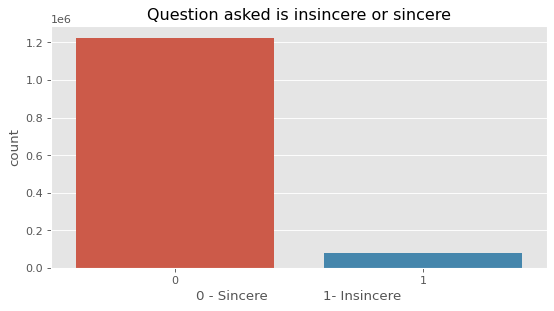

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='target', data=train_df)
plt.title('Question asked is insincere or sincere')
plt.xlabel('0 - Sincere             1- Insincere')
plt.show()

**Observation :**

The dataset is **imbalanced**, with sincere label being the majority

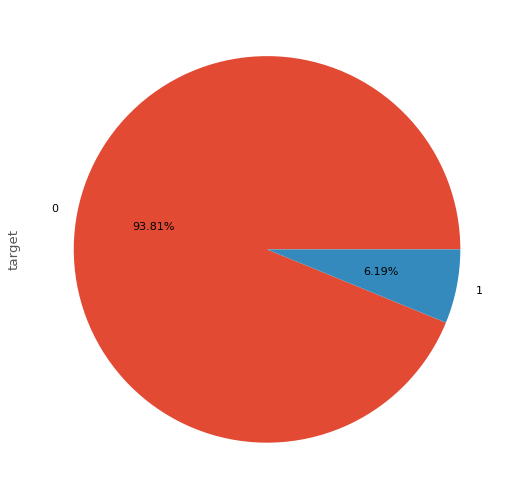

In [ ]:
plt.figure(figsize=(8,8))
train_df['target'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

**Observation :**

Around 6% of the training data are insincere questions (target=1) and rest of them are sincere (target=0)


## Feature Distribution

In [ ]:
# getting featues like number of characters, words, stopwords etc
feature_df = get_features(train_df, 'question_text')
feature_df.head()

,qid,question_text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,digits_counts,uppercase_counts,unique_words_count,numbers_count,punctuations_count,char_length,titlewords_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,60,13,4.615385,6,1,0,13,4,1,72,2
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,66,16,4.125000,9,1,0,15,0,2,81,1
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,58,10,5.800000,1,0,0,8,0,2,67,2
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,49,9,5.444444,2,0,0,9,0,1,57,4
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,63,15,4.200000,5,0,2,15,0,1,77,3


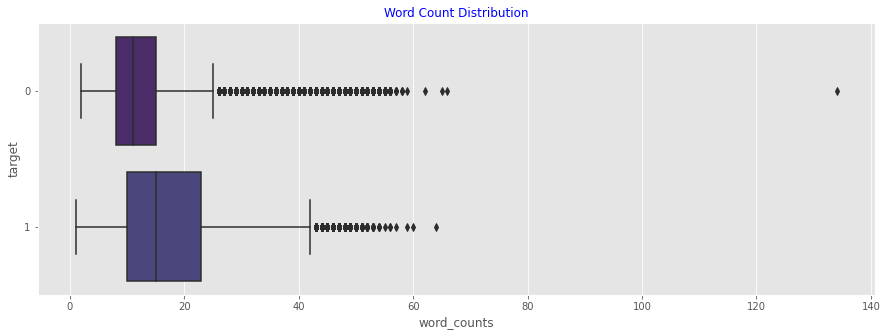

In [ ]:
get_boxplot(df= feature_df,
            x='word_counts',
            y= 'target',
            title = 'Word Count Distribution')

**Observation :**

Insincere questions (target 1) have more words/question

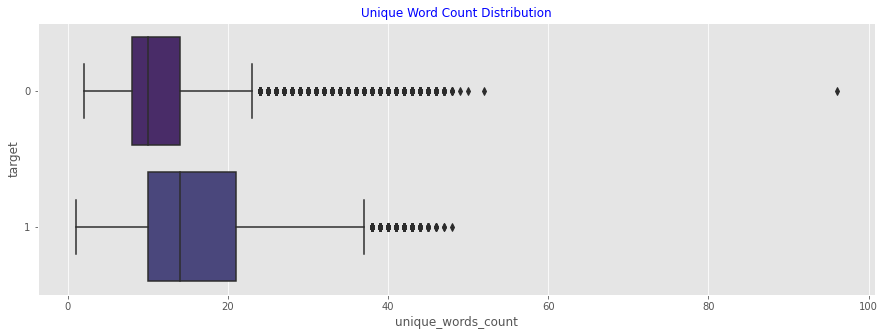

In [ ]:
get_boxplot(df= feature_df,
            x='unique_words_count',
            y= 'target',
            title = 'Unique Word Count Distribution')

**Observation :**

Insincere questions (target 1) have more unique words than sincere questions (target 0)

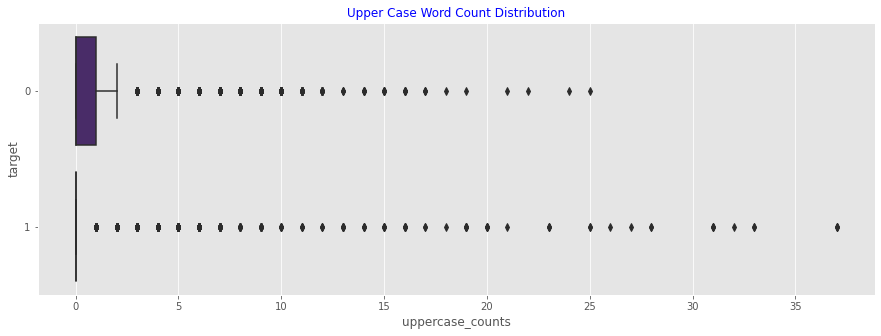

In [ ]:
get_boxplot(df= feature_df,
            x='uppercase_counts',
            y= 'target',
            title = 'Upper Case Word Count Distribution')

**Observation :**

Sincere questions (target 0) have more unique words than insincere questions (target 1)

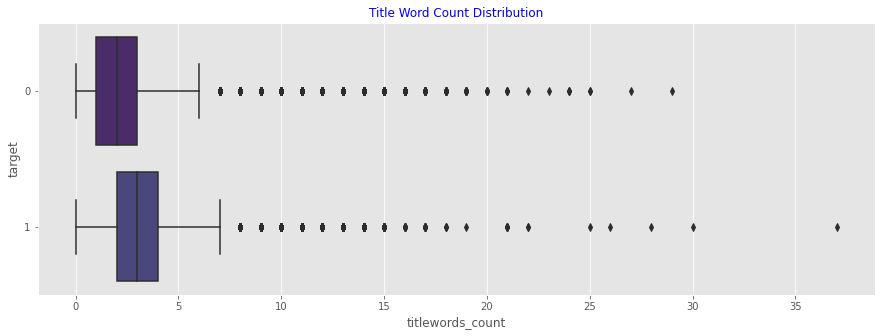

In [ ]:
get_boxplot(df= feature_df,
            x='titlewords_count',
            y= 'target',
            title = 'Title Word Count Distribution')

**Observation :**

Insincere questions (target 1) have more Title words than sincere questions (target 0)

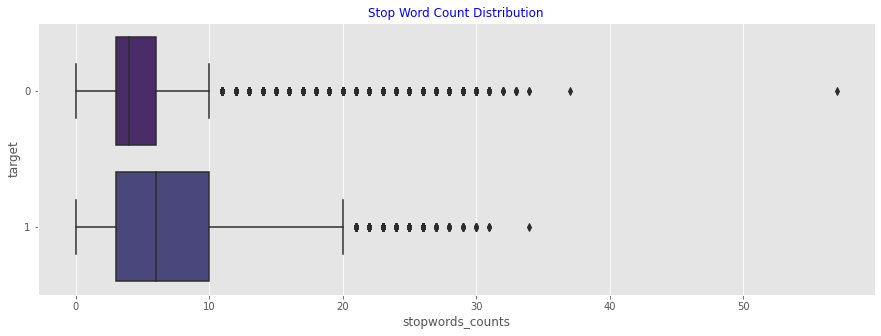

In [ ]:
get_boxplot(df= feature_df,
            x='stopwords_counts',
            y= 'target',
            title = 'Stop Word Count Distribution')

**Observation :**

Insincere questions (target 1) have more stop words/question than sincere questions (target 0)

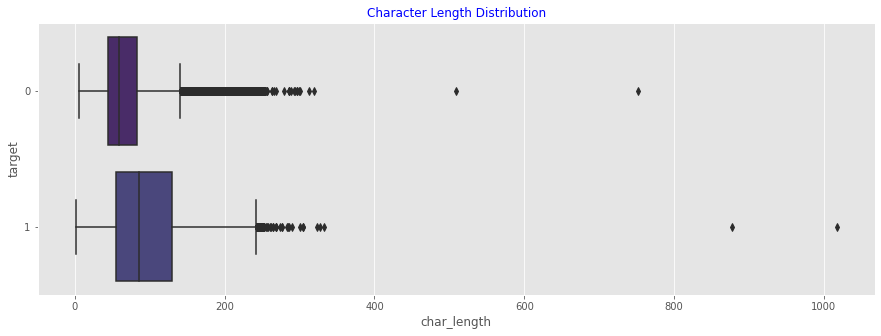

In [ ]:
get_boxplot(df= feature_df,
            x='char_length',
            y= 'target',
            title = 'Character Length Distribution')

**Observation :**

Insincere questions (target 1) have more Character/questions than sincere questions (target 0)

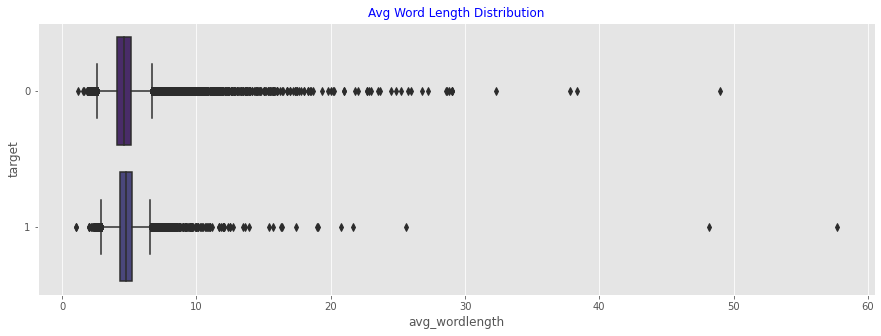

In [ ]:
get_boxplot(df= feature_df,
            x='avg_wordlength',
            y= 'target',
            title = 'Avg Word Length Distribution')

**Observation :**

Similar average length of questions for sincere and insincere questions

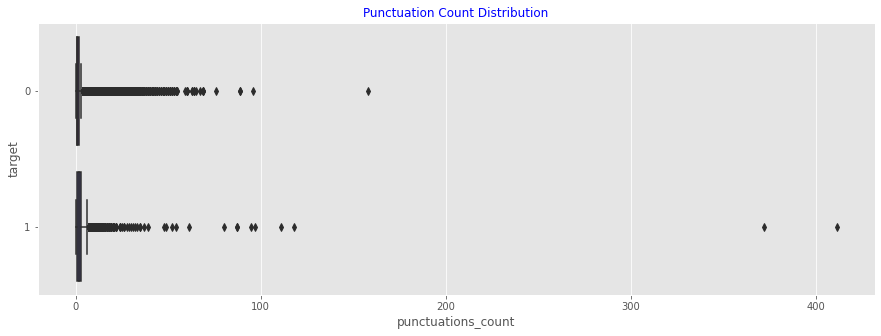

In [ ]:
get_boxplot(df= feature_df,
            x='punctuations_count',
            y= 'target',
            title = 'Punctuation Count Distribution')

**Observation :**

Slightly more number of punctuations in insincere questions

## N-gram Visualization

In [ ]:
sincere_df = train_df[train_df['target']== 0]
insincere_df = train_df[train_df['target']== 1]

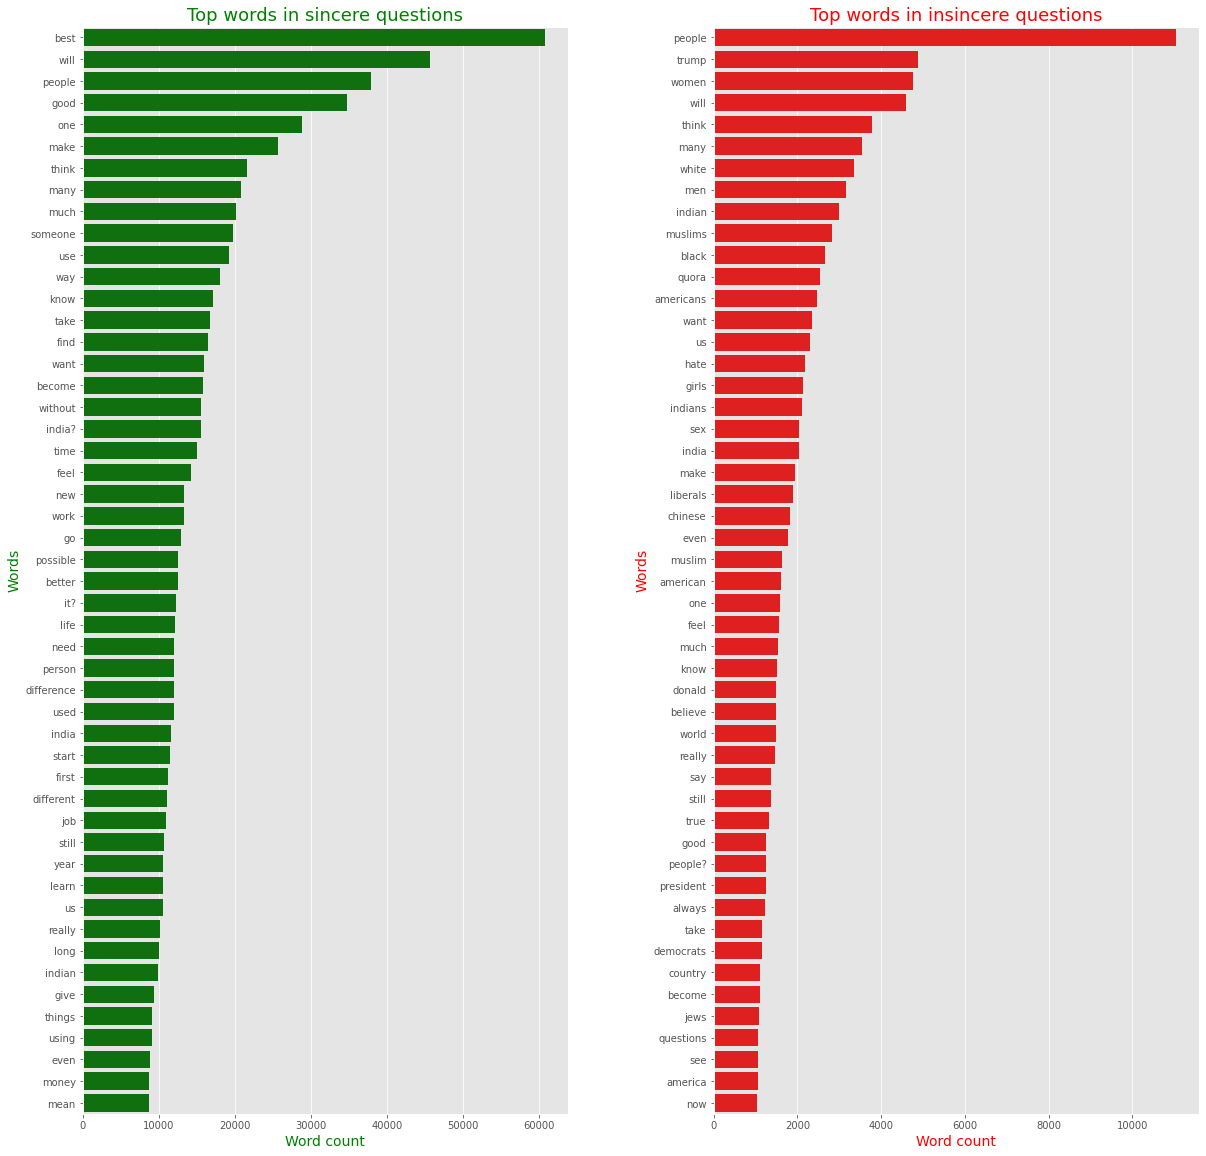

In [ ]:
sincere_1gram = get_ngrams(sincere_df, 'question_text', 1, 50)
insincere_1gram = get_ngrams(insincere_df, 'question_text', 1, 50)
comparison_plot(sincere_1gram,insincere_1gram,'word','wordcount',figsize_w=20, figsize_h=20, spacing=0.3)

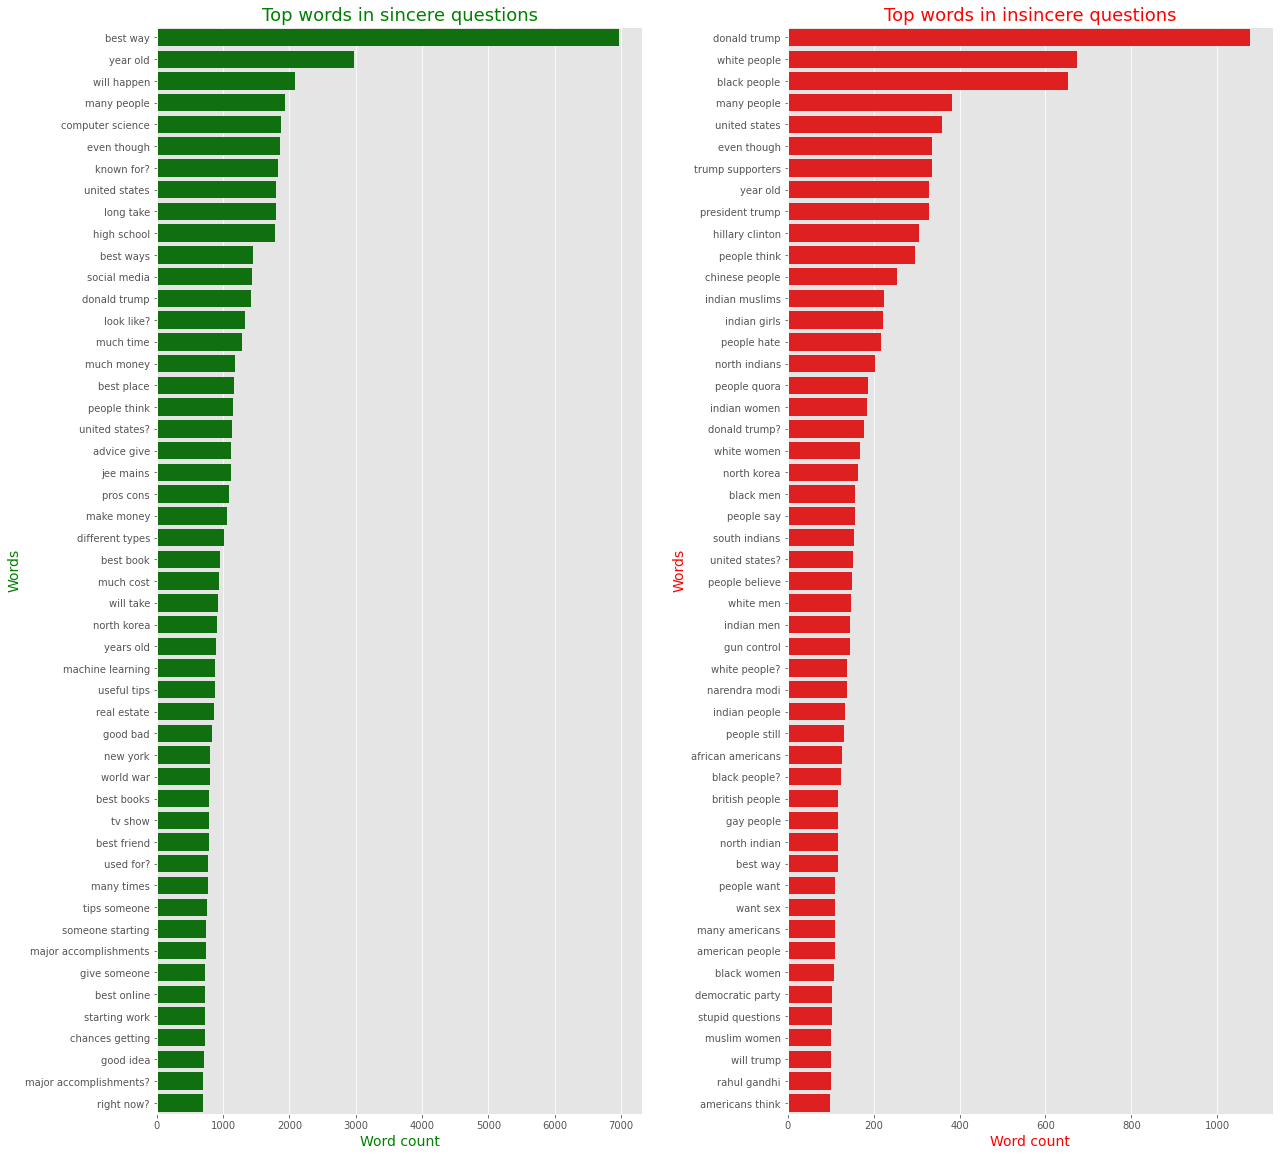

In [ ]:
sincere_2gram = get_ngrams(sincere_df, 'question_text', 2, 50)
insincere_2gram = get_ngrams(insincere_df, 'question_text', 2, 50)
comparison_plot(sincere_2gram,insincere_2gram,'word','wordcount',figsize_w=20, figsize_h=20, spacing=0.3)

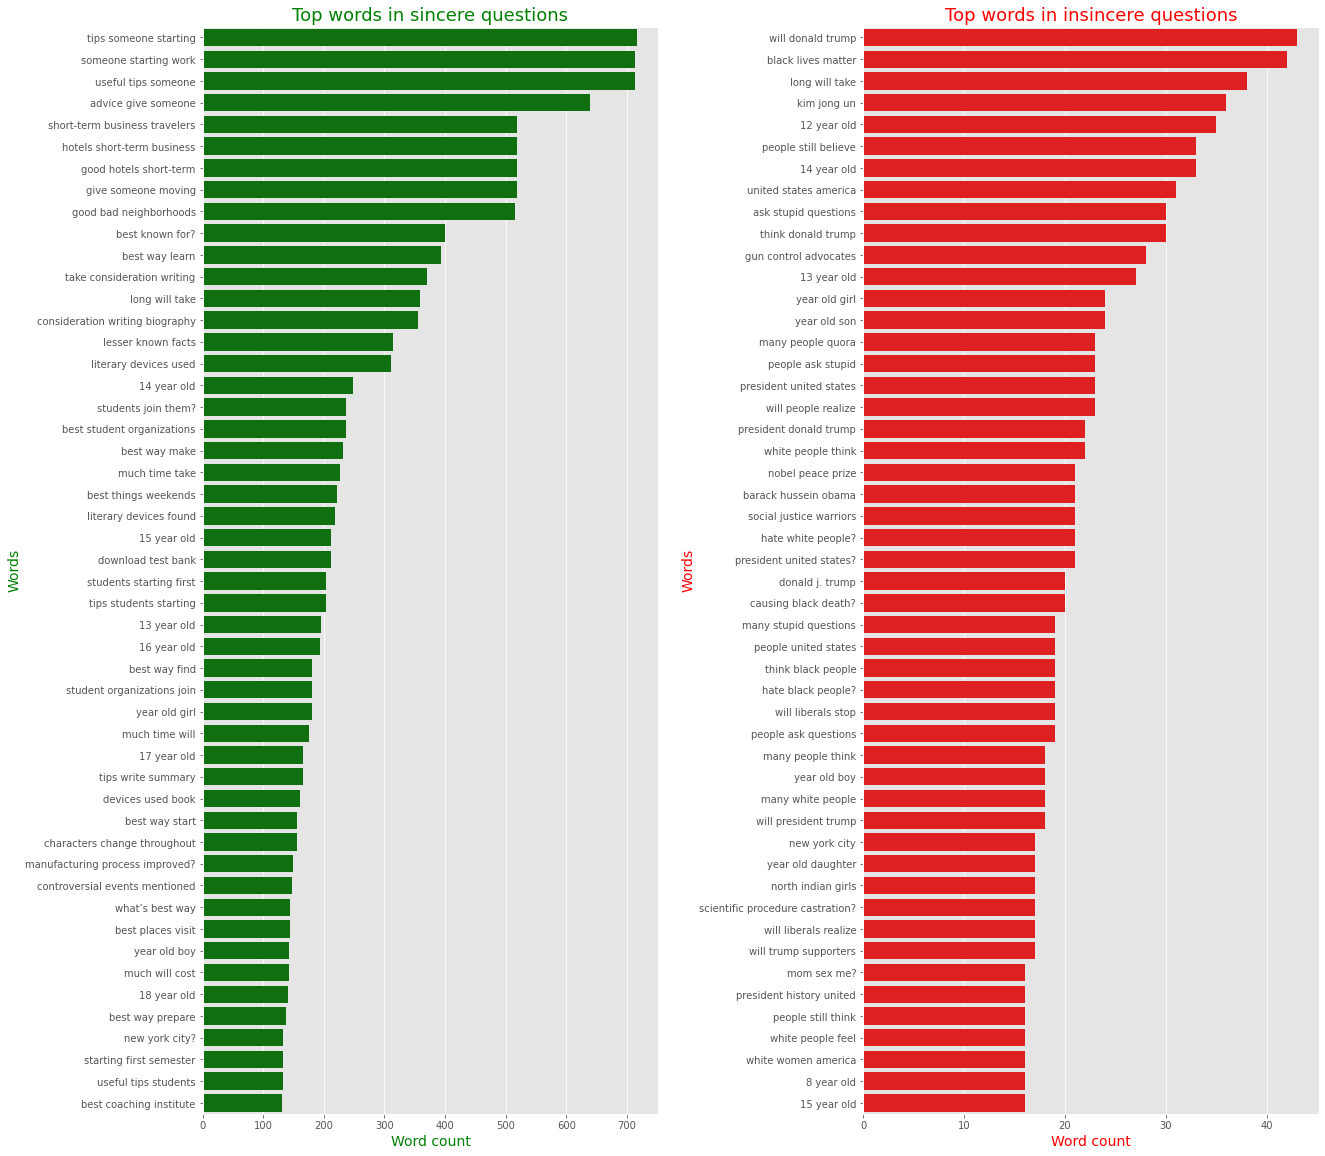

In [ ]:
sincere_3gram = get_ngrams(sincere_df, 'question_text', 3, 50)
insincere_3gram = get_ngrams(insincere_df, 'question_text', 3, 50)
comparison_plot(sincere_3gram,insincere_3gram,'word','wordcount',figsize_w=20, figsize_h=20,spacing=0.45)

# Feature Importance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df['question_text'], train_df['target'], test_size=TEST_SIZE, random_state=0)

In [ ]:
# Get the tfidf vectors
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
tfidf.fit_transform(X_train.values.tolist())
X_train_tfidf = tfidf.transform(X_train.values.tolist())

In [ ]:
model = LogisticRegression(C=5., solver='sag')
model.fit(X_train_tfidf, y_train.values)

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# https://www.kaggle.com/lopuhin/eli5-for-mercari
eli5.show_weights(model, vec=tfidf, top=50, feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+18.244,castrated
+17.106,democrats
+16.708,liberals
+16.640,muslims
+16.129,castrate
+15.040,indians
+14.522,americans
+14.382,trump
+13.890,women
+13.883,feminists
